<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Homework01_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Astroestatística**

Homework 01

Nome: Fernanda Araujo de Oliveira

In [ ]:
!pip install emcee

In [ ]:
!pip install corner

In [3]:
# bibliotecas

import urllib.request #usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare as chi2
from scipy.stats import norm, skewtest, kurtosis
import scipy as sp
import math
from scipy.optimize import minimize
from multiprocessing import Pool
import emcee
import time
#from chainconsumer import ChainConsumer
import corner

In [4]:
# importando o drive do colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1) Take a normal distribution with mean equals to 20 and variance equals to 10, i.e., N (20, $\sqrt{10}$). Produce N samples with 8 data points each assuming such a distribution, and prove the central limit theorem using those samples.

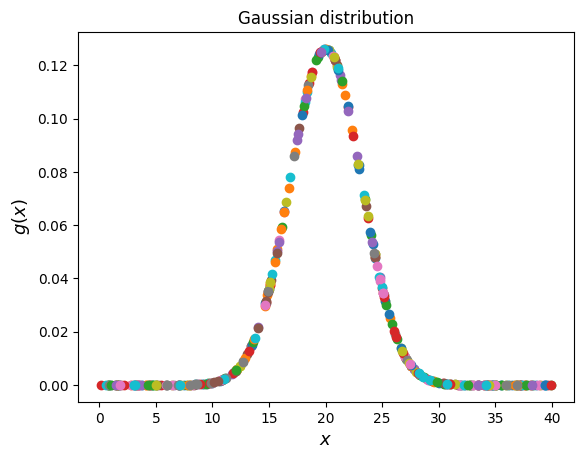

In [5]:
# normal distribution
def gaussiana(x, m, s):
    return ( 1 / ( s * np.sqrt(2 * np.pi) ) ) * np.exp( -0.5 * ( (x - m) / s )**2)

# média
m = 20

# variância
v = np.sqrt(10)

for i in range(50):
    xi = np.random.rand(8)*(m*2)
    plt.scatter(xi, gaussiana(xi, m, v))

# legenda, label e título
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$g(x)$", fontsize=13)
plt.title('Gaussian distribution')
plt.show()

O Teorema do Limite Central afirma que a média de uma amostra de **n** elementos de uma população tende a uma distribuição gaussiana. Então, ao aumentarmos o número de pontos das amostras de 8 para 100, obtemos:

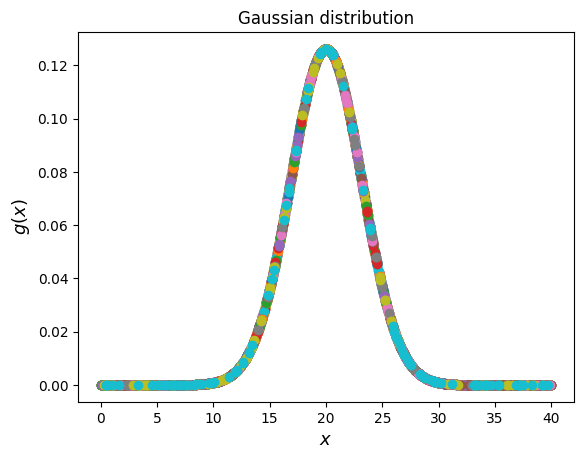

In [6]:
for i in range(50):
    xi = np.random.rand(100)*(m*2)
    plt.scatter(xi, gaussiana(xi, m, v))

# legenda, label e título
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$g(x)$", fontsize=13)
plt.title('Gaussian distribution')
plt.show()

2) Consider the galaxy cluster catalogues named WHL12-2015updated and WHL15-rich.dat.

a) Plot a histogram of the redshift distribution of the objects in both catalogues – fourth column from left to right. State what is the bin width assumed in these plots.

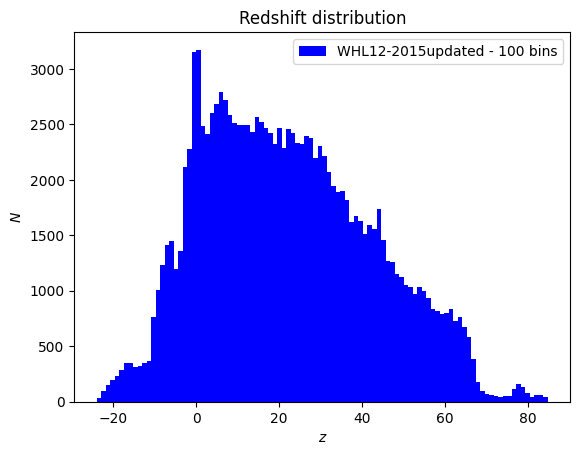

In [7]:
# dados de WHL12_2015updated.dat
data = pd.read_table('/content/gdrive/MyDrive/Astroestatística/WHL12_2015updated.txt', sep='\s+', header=None, names=['name', 'RAdeg', 'DEdeg', 'zphot', 'zspec', 'rmag', 'r200', 'RL', 'N200', 'r500', 'RL500', 'N500sp', 'N500', '?'], index_col=False)

z = data.iloc[:, 3]


# PLOTE

plt.hist(z, bins=100, label='WHL12-2015updated - 100 bins', color='blue')

# legenda, label e título
plt.xlabel("$z$")
plt.ylabel("$N$")
plt.legend(loc='best')
plt.title('Redshift distribution')
plt.show()

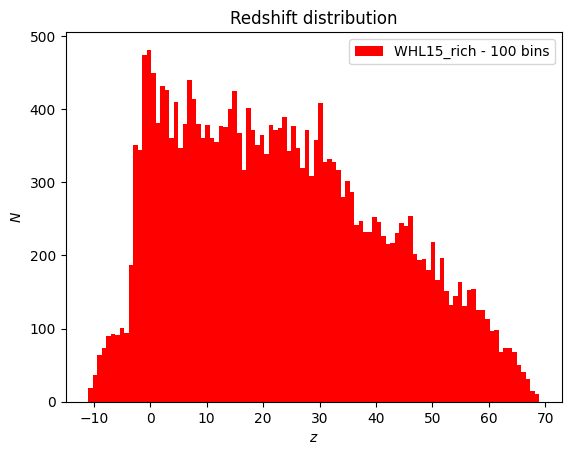

In [8]:
# dados de WHL15_rich.dat
data2 = pd.read_table('/content/gdrive/MyDrive/Astroestatística/WH15_rich.txt', sep='\s+', header=None, names=['name', 'RAdeg', 'DECdeg', 'zspec', 'rmag', 'r500', 'RL500', 'N500sp', 'Ns500', '?'], index_col=False)

z2 = data2.iloc[:, 3]


# PLOTE

plt.hist(z2, bins=100, label='WHL15_rich - 100 bins', color='red')

# legenda, label e título
plt.xlabel("$z$")
plt.ylabel("$N$")
plt.legend(loc='best')
plt.title('Redshift distribution')
plt.show()

b) Fit a Gaussian curve over those histograms. What is the mean, variance and higher order momenta (skewness and kurtosis) obtained for each case? Tip: You can use python fitting routines to perform this procedure.

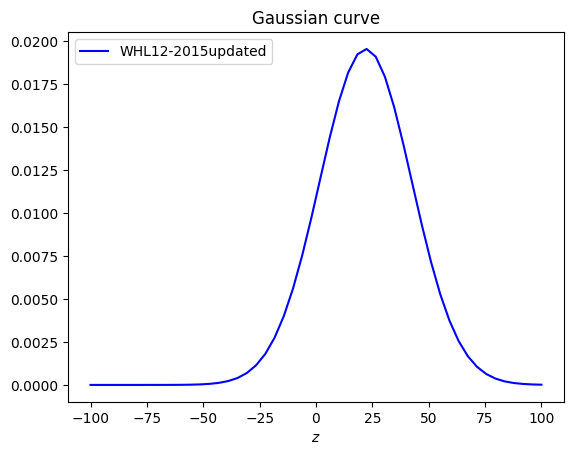

Média: 22.084, Desvio padrão: 20.415, Skewness: 52.997, Kurtosis: -0.536 



In [9]:
# média
m1 = np.mean(z)

# desvio padrão
dp1 = np.std(z)

x = np.linspace(-100, 100)

plot1 = norm.pdf(x, m1, dp1)


# PLOTE
plt.plot(x, plot1, label='WHL12-2015updated', color='blue')

# legenda, label e título
plt.xlabel("$z$")
plt.legend(loc='best')
plt.title('Gaussian curve')
plt.show()

# momentos de ordem maior
sk1 = skewtest(z)
k1 = kurtosis(z)

print('Média: {:.3f}, Desvio padrão: {:.3f}, Skewness: {:.3f}, Kurtosis: {:.3f} \n'.format(m1, dp1, sk1[0], k1))

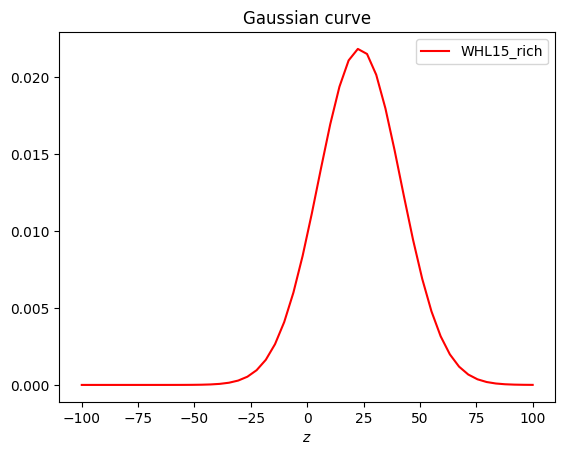

Média: 23.252, Desvio padrão: 18.271, Skewness: 22.515, Kurtosis: -0.805 



In [10]:
# média
m2 = np.mean(z2)

# desvio padrão
dp2 = np.std(z2)

x2 = np.linspace(-100, 100)

plot2 = norm.pdf(x, m2, dp2)


# PLOTE
plt.plot(x2, plot2, label='WHL15_rich', color='red')

# legenda, label e título
plt.xlabel("$z$")
plt.legend(loc='best')
plt.title('Gaussian curve')
plt.show()

# momentos de ordem maior
sk2 = skewtest(z2)
k2 = kurtosis(z2)

print('Média: {:.3f}, Desvio padrão: {:.3f}, Skewness: {:.3f}, Kurtosis: {:.3f} \n'.format(m2, dp2, sk2[0], k2))

3) Consider the cosmic chronometer measurements, namely H(z), in the data file hz.dat. Each column (left to right) represent the redshift (z), Hubble expansion rate (H(z)), its corresponding uncertainty ($\sigma$H(z)), while the last column can be neglected for the time being. Also consider that, in the standard cosmological model paradigm (flat $\Lambda$CDM), the Hubble expansion rate is given by:

$H(z) = H_0 ( \Omega_m (1+z)^3 + 1 - \Omega_m )^{1/2}$

Hence, $H_0$ denotes the Hubble Constant, and $\Omega_m$ consists on the total matter density parameter of the Universe. In other words, these are the free parameters that describe our model.

a) a An estimate of the $H_0$ best fit value using the cosmological model and data provided, i.e., the parameter value that best represents the data using the maximum likelihood method through $\chi^2$ minimisation. Fix $\Omega_m$ to $\Omega_m$ = 0.20, 0.30, and 0.40, and compare the results obtained for each case.

b) A plot of the $H_0$ likelihood for each case.

c) The $\chi^2$ values at their best fits, as well as the $\chi^2_{\nu}$. Given the values obtained for the latter quantity, what is the $\Omega_m$ value that gives the best estimate among all? Explain.

In [11]:
# baixando os dados

hz = pd.read_table('/content/gdrive/MyDrive/Astroestatística/hz.dat',  sep='\s+', header=None, names=['z', 'H', 'sH', 'Number'], index_col=False)

z = hz.iloc[:, 0]
H_data = hz.iloc[:, 1]
sigma_H = hz.iloc[:, 2]

df = pd.DataFrame({"z":z, "H":H_data, "sigma":sigma_H})
#print(df)

z = df["z"]
H_data = df["H"]
sigma_H = df["sigma"]

i) $\Omega_{m0}$ = 0.20.

113.9114753633909
[74.65104083]


100%|██████████| 3000/3000 [01:17<00:00, 38.96it/s]


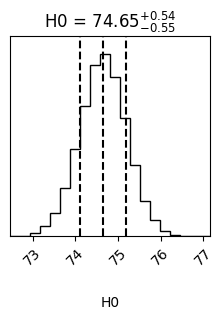

In [12]:
Om_0 = 0.2

# Modelo LCDM:
def H(H0):
    Om = Om_0 * (1+z)**(3)
    OL = 1 - Om_0
    H = H0 * np.sqrt(Om + OL)
    return H

def chi(H0):
    H_model = H(H0)
    chisq_vec = np.power((H_model - H_data)/sigma_H, 2)
    return chisq_vec.sum()

def chisq_H(pars):
    H0 = pars
    return chi(H0)

print(chi(70))

# Priors:
H0_ini = 70

result = minimize(chisq_H, [H0_ini], bounds=((60, 80),))
H0min = result.x
print(result.x)

# Priors:
def lnprior(pars):
    H0 = pars
    if  60 < H0 < 80:
        return 0.0
    return -np.inf

def lnlike_H(pars):
    H0 = pars
    return -0.5*chisq_H(H0)

def lnprob_H(pars):
    lp = lnprior(pars)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike_H(pars)

with Pool() as pool:
    ndim, nwalkers, nsteps = 1, 15, 3000
    pos = [H0min + 1e-5*np.random.randn(ndim) for i in range(nwalkers)]
    sampler= emcee.EnsembleSampler(nwalkers, ndim, lnprob_H, pool=pool)
    sampler.run_mcmc(pos, nsteps,progress=True)
    end = time.time()
    test_chain= sampler.flatchain

samples1 = sampler.flatchain
samples1[np.argmax(sampler.flatlnprobability)]
np.savetxt("ResultsHLCDM2.txt", samples1, fmt="%s")

labels = ['H0']
fig = corner.corner(samples1, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84])

In [13]:
# item c

# chi2

like_model =  sampler.get_log_prob(flat=False)
chi2_model = -2*like_model

print(chi2_model.min())

# chi2 reduzido

x2_rd = chi2_model.min()/(50-1)

print(x2_rd)

41.952379377770036
0.8561710077095925


ii) $\Omega_{m0}$ = 0.30

42.59912637202777
[68.35450712]


100%|██████████| 3000/3000 [01:18<00:00, 38.00it/s]


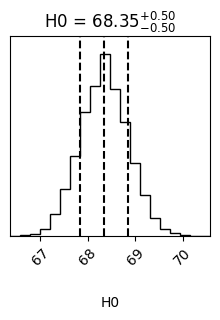

In [14]:
Om_0 = 0.3

# Modelo LCDM:
def H(H0):
    Om = Om_0 * (1+z)**(3)
    OL = 1 - Om_0
    H = H0 * np.sqrt(Om + OL)
    return H

def chi(H0):
    H_model = H(H0)
    chisq_vec = np.power((H_model - H_data)/sigma_H, 2)
    return chisq_vec.sum()

def chisq_H(pars):
    H0 = pars
    return chi(H0)

print(chi(70))

# Priors:
H0_ini = 70

result = minimize(chisq_H, [H0_ini], bounds=((60, 80),))
H0min = result.x
print(result.x)

# Priors:
def lnprior(pars):
    H0 = pars
    if  60 < H0 < 80:
        return 0.0
    return -np.inf

def lnlike_H(pars):
    H0 = pars
    return -0.5*chisq_H(H0)

def lnprob_H(pars):
    lp = lnprior(pars)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike_H(pars)

with Pool() as pool:
    ndim, nwalkers, nsteps = 1, 15, 3000
    pos = [H0min + 1e-5*np.random.randn(ndim) for i in range(nwalkers)]
    sampler= emcee.EnsembleSampler(nwalkers, ndim, lnprob_H, pool=pool)
    sampler.run_mcmc(pos, nsteps,progress=True)
    end = time.time()
    test_chain= sampler.flatchain

samples1 = sampler.flatchain
samples1[np.argmax(sampler.flatlnprobability)]
np.savetxt("ResultsHLCDM2.txt", samples1, fmt="%s")

labels = ['H0']
fig = corner.corner(samples1, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84])

In [15]:
# item c

# chi2

like_model =  sampler.get_log_prob(flat=False)
chi2_model = -2*like_model

print(chi2_model.min())

# chi2 reduzido

x2_rd = chi2_model.min()/(50-1)

print(x2_rd)

31.850539330686978
0.6500110067487138


iii) $\Omega_{m0}$ = 0.40

268.8113122887837
[63.35325952]


100%|██████████| 3000/3000 [01:18<00:00, 38.11it/s]


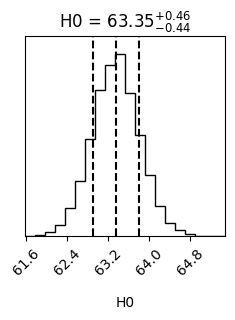

In [16]:
Om_0 = 0.4

# Modelo LCDM:
def H(H0):
    Om = Om_0 * (1+z)**(3)
    OL = 1 - Om_0
    H = H0 * np.sqrt(Om + OL)
    return H

def chi(H0):
    H_model = H(H0)
    chisq_vec = np.power((H_model - H_data)/sigma_H, 2)
    return chisq_vec.sum()

def chisq_H(pars):
    H0 = pars
    return chi(H0)

print(chi(70))

# Priors:
H0_ini = 70

result = minimize(chisq_H, [H0_ini], bounds=((60, 80),))
H0min = result.x
print(result.x)

# Priors:
def lnprior(pars):
    H0 = pars
    if  60 < H0 < 80:
        return 0.0
    return -np.inf

def lnlike_H(pars):
    H0 = pars
    return -0.5*chisq_H(H0)

def lnprob_H(pars):
    lp = lnprior(pars)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike_H(pars)

with Pool() as pool:
    ndim, nwalkers, nsteps = 1, 15, 3000
    pos = [H0min + 1e-5*np.random.randn(ndim) for i in range(nwalkers)]
    sampler= emcee.EnsembleSampler(nwalkers, ndim, lnprob_H, pool=pool)
    sampler.run_mcmc(pos, nsteps,progress=True)
    end = time.time()
    test_chain= sampler.flatchain

samples1 = sampler.flatchain
samples1[np.argmax(sampler.flatlnprobability)]
np.savetxt("ResultsHLCDM2.txt", samples1, fmt="%s")

labels = ['H0']
fig = corner.corner(samples1, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84])

In [17]:
# item c

# chi2

like_model =  sampler.get_log_prob(flat=False)
chi2_model = -2*like_model

print(chi2_model.min())

# chi2 reduzido

x2_rd = chi2_model.min()/(50-1)

print(x2_rd)

65.01520135889018
1.3268408440589834


O melhor ajuste de $H_0$ será aquele em que o $\chi^2_\nu$ terá o valor mais próximo de 1. Os valores obtidos foram:

$\Omega_{m0}$ = 0.20: $\chi^2_\nu$ = 0.8561710077095823

$\Omega_{m0}$ = 0.30: $\chi^2_\nu$ = 0.6500110067487226

$\Omega_{m0}$ = 0.40: $\chi^2_\nu$ = 1.326840844058974

Os três valores obtidos de $\chi^2_\nu$ estão próximos de 1. Porém, destes, o melhor valor foi o obtido com $\Omega_{m0}$ = 0.20, pois foi com este valor de $\Omega_{m0}$ que obtivemos $\chi^2_\nu$ mais próximo de 1 dentre os casos analisados.

Com relação aos resultados obtidos, observamos que, quanto maior o valor de $\Omega_{m0}$, menor será o valor de $H_0$. Ou seja, quanto maior a quantidade de matéria no universo, menor será a sua taxa de expansão.

4) Consider the data provided in the data-hmwrk01-ex4.dat file. Let us assume that these value represent the number counts of quasars across 20 disjoint sky regions of the same angular size. Perform a resampling procedure using the bootstrap method with N = 100, N = 1000 and N = 10000. What is the mean and standard deviation obtained from them? Plot the results and explain.

In [18]:
# baixando os dados
data4 = pd.read_csv('/content/gdrive/MyDrive/Astroestatística/data_hmwrk01_ex4.dat.dat', skiprows=2, delim_whitespace=True, names=['quasars'])

dados = data4["quasars"]

m_dados = np.mean(dados)

dp_dados = np.std(dados)

bootstrap1 = []
for i in range(100):
    bootstrap1.append(random.choice(dados))

bootstrap2 = []
for i in range(1000):
    bootstrap2.append(random.choice(dados))

bootstrap3 = []
for i in range(10000):
    bootstrap3.append(random.choice(dados))


# média e desvio padrão dos bootstrap

# bootstrap 1
m_b1 = np.mean(bootstrap1)
dp_b1 = np.std(bootstrap1)

# bootstrap 2
m_b2 = np.mean(bootstrap2)
dp_b2 = np.std(bootstrap2)

# bootstrap 3
m_b3 = np.mean(bootstrap3)
dp_b3 = np.std(bootstrap3)

In [19]:
# printando os valores
print("Para a amostra original")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(m_dados, dp_dados))

print("Para N = 100:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(m_b1, dp_b1))

print("Para N = 1000:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(m_b2, dp_b2))

print("Para N = 10000:")
print('Média: {:.3f}; Desvio padrão: {:.3f} \n'.format(m_b3, dp_b3))

Para a amostra original
Média: 32.236; Desvio padrão: 3.852 

Para N = 100:
Média: 31.693; Desvio padrão: 3.896 

Para N = 1000:
Média: 32.180; Desvio padrão: 3.772 

Para N = 10000:
Média: 32.208; Desvio padrão: 3.843 



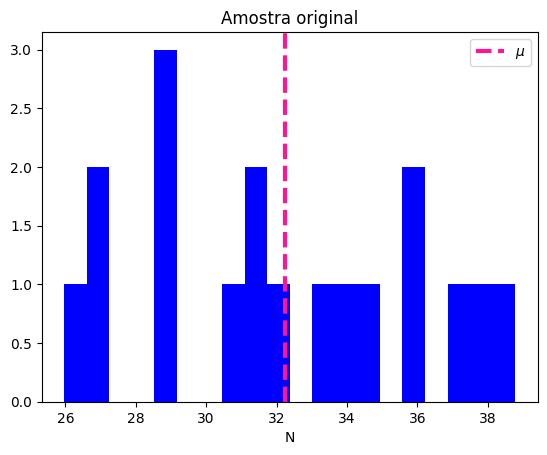

In [20]:
# amostra original
plt.hist(dados, bins=20, color='blue')
plt.axvline(m_dados, color='deeppink', linestyle='--', linewidth=3, label='$\mu$')

# legenda, label e título
plt.xlabel('N')
plt.title('Amostra original')
plt.legend(loc='best')
plt.show()

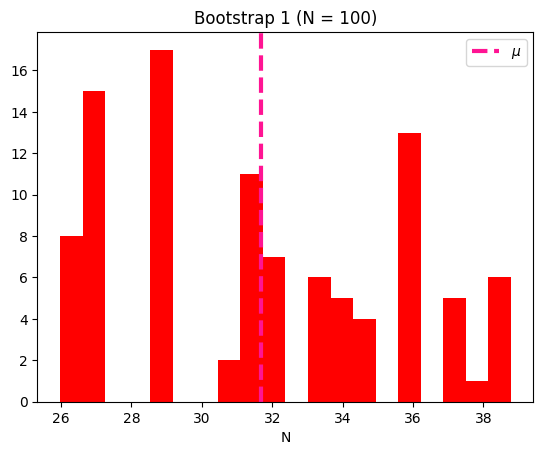

In [21]:
# N = 100

# PLOTE
plt.hist(bootstrap1, bins=20, color='red')
plt.axvline(m_b1, color='deeppink', linestyle='--', linewidth=3, label='$\mu$')

# legenda, label e título
plt.xlabel('N')
plt.title('Bootstrap 1 (N = 100)')
plt.legend(loc='best')
plt.show()

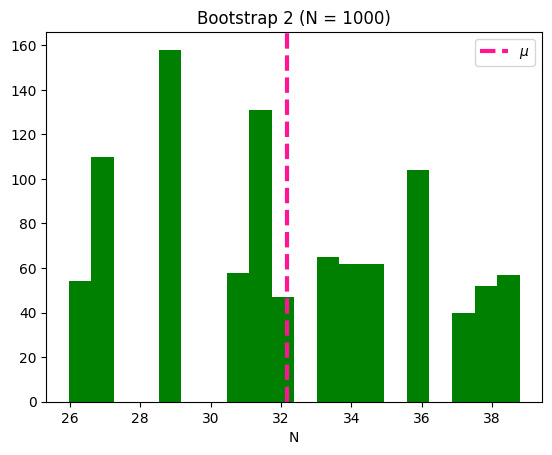

In [22]:
# N = 1000

# PLOTE
plt.hist(bootstrap2, bins=20, color='green')
plt.axvline(m_b2, color='deeppink', linestyle='--', linewidth=3, label='$\mu$')

# legenda, label e título
plt.xlabel('N')
plt.title('Bootstrap 2 (N = 1000)')
plt.legend(loc='best')
plt.show()

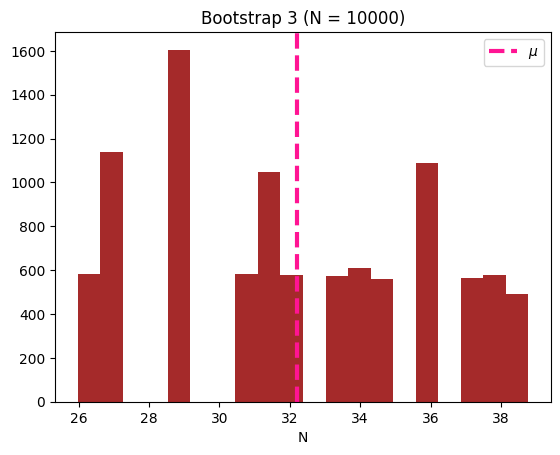

In [23]:
# N = 10000

# PLOTE
plt.hist(bootstrap3, bins=20, color='brown')
plt.axvline(m_b3, color='deeppink', linestyle='--', linewidth=3, label='$\mu$')

# legenda, label e título
plt.xlabel('N')
plt.legend(loc='best')
plt.title('Bootstrap 3 (N = 10000)')
plt.show()

Explicação: O método *Bootstrap* gera um grande número de conjunto de dados a partir da amostra original, tomando, com reposição, n pontos aleatórios. Isso significa que alguns pontos da amostra original podem ser repetidos e outros podem não aparecer. Portanto, é esperado que, para cada N diferente (100, 1000 e 10000), teremos valores da média e do desvio padrão diferentes, porém relativamente próximos, que é o que observamos neste caso.